# 1. Importando bibliotecas e dados

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
profiles = pd.read_csv("../data/processed/profile_for_clustering.csv")
profiles.head(3)

,account_id,age,credit_card_limit,gender,registered_on,year_month_joined,credit_card_limit_03_Entre_63000_e_79000,credit_card_limit_02_Entre_49000_e_63000,credit_card_limit_04_Acima_de_79000,credit_card_limit_01_Abaixo_de_49000,...,total_offers_bogo_02_Entre_1_e_2,total_offers_discount_01_Abaixo_de_1,total_offers_discount_04_Acima_de_3,total_offers_discount_00_Sem_dados,total_offers_discount_03_Entre_2_e_3,total_offers_discount_02_Entre_1_e_2,total_offers_informational_03_Entre_1_e_2,total_offers_informational_01_Abaixo_de_1,total_offers_informational_00_Sem_dados,total_offers_informational_04_Acima_de_2
0,c05652fa9d2c4fac9a010ea5a9310c86,06_Acima_de_60+,03_Entre_63000_e_79000,M,2018-01-27,2018-01,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,6be0513109fe4d738e2af7fb252fefb7,04_Entre_40_e_49,02_Entre_49000_e_63000,M,2018-06-13,2018-06,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,9de54389816342449e445db1d75d341d,00_Sem_dados,00_Sem_dados,NaN,2018-04-22,2018-04,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
ready_to_use_cols = [
    # credit_card_limit
    "credit_card_limit_03_Entre_63000_e_79000",
    "credit_card_limit_02_Entre_49000_e_63000",
    "credit_card_limit_04_Acima_de_79000",
    "credit_card_limit_01_Abaixo_de_49000",
    "credit_card_limit_00_Sem_dados",
    # age
    "age_04_Entre_40_e_49",
    "age_02_Entre_18_e_29",
    "age_03_Entre_30_e_39",
    "age_00_Sem_dados",
    "age_05_Entre_50_e_59",
    "age_06_Acima_de_60+",
    # total_transactions
    "total_transactions_03_Entre_7_e_11",
    "total_transactions_02_Entre_4_e_7",
    "total_transactions_00_Sem_dados",
    "total_transactions_01_Abaixo_de_4",
    "total_transactions_04_Acima_de_11",
    # avg_amount
    "avg_amount_02_Entre_3_e_12",
    "avg_amount_04_Entre_20_e_28",
    "avg_amount_03_Entre_12_e_20",
    "avg_amount_00_Sem_dados",
    "avg_amount_01_Abaixo_de_3",
    "avg_amount_05_Acima_de_28",
    # most_used_offer_type
    "most_used_offer_type_discount",
    "most_used_offer_type_bogo",
    "most_used_offer_type_None",
    # transactions_offer_rate
    "transactions_offer_rate_03_Entre_17%_e_33%",
    "transactions_offer_rate_04_Acima_de_33%",
    "transactions_offer_rate_02_Entre_0%_e_17%",
    "transactions_offer_rate_00_Sem_dados",
    "transactions_offer_rate_01_Abaixo_de_0%",
    # avg_time_to_use_offer
    "avg_time_to_use_offer_02_Entre_2_e_2",
    "avg_time_to_use_offer_03_Entre_2_e_4",
    "avg_time_to_use_offer_00_Sem_dados",
    "avg_time_to_use_offer_01_Abaixo_de_2",
    "avg_time_to_use_offer_04_Acima_de_4",
    # avg_time_to_view_offer
    "avg_time_to_view_offer_01_Abaixo_de_1",
    "avg_time_to_view_offer_04_Acima_de_3",
    "avg_time_to_view_offer_00_Sem_dados",
    "avg_time_to_view_offer_03_Entre_2_e_3",
    "avg_time_to_view_offer_02_Entre_1_e_2",
    # all_coupon_usage_rate
    "all_coupon_usage_rate_04_Acima_de_71%",
    "all_coupon_usage_rate_02_Entre_0%_e_33%",
    "all_coupon_usage_rate_03_Entre_33%_e_71%",
    "all_coupon_usage_rate_00_Sem_dados",
    "all_coupon_usage_rate_01_Abaixo_de_0%",
    # pct_used_channel_mobile
    "pct_used_channel_mobile_04_Acima_de_71%",
    "pct_used_channel_mobile_02_Entre_0%_e_33%",
    "pct_used_channel_mobile_03_Entre_33%_e_71%",
    "pct_used_channel_mobile_00_Sem_dados",
    "pct_used_channel_mobile_01_Abaixo_de_0%",
    # pct_used_channel_email
    "pct_used_channel_email_04_Acima_de_71%",
    "pct_used_channel_email_02_Entre_0%_e_33%",
    "pct_used_channel_email_03_Entre_33%_e_71%",
    "pct_used_channel_email_00_Sem_dados",
    "pct_used_channel_email_01_Abaixo_de_0%",
    # pct_used_channel_social
    "pct_used_channel_social_04_Acima_de_89%",
    "pct_used_channel_social_03_Entre_50%_e_89%",
    "pct_used_channel_social_00_Sem_dados",
    "pct_used_channel_social_01_Abaixo_de_0%",
    "pct_used_channel_social_02_Entre_0%_e_50%",
    # pct_used_channel_web
    "pct_used_channel_web_04_Acima_de_75%",
    "pct_used_channel_web_02_Entre_0%_e_33%",
    "pct_used_channel_web_00_Sem_dados",
    "pct_used_channel_web_03_Entre_33%_e_75%",
    "pct_used_channel_web_01_Abaixo_de_0%",
    # pct_used_type_bogo
    "pct_used_type_bogo_02_Entre_0%_e_25%",
    "pct_used_type_bogo_00_Sem_dados",
    "pct_used_type_bogo_03_Entre_25%_e_100%",
    "pct_used_type_bogo_01_Abaixo_de_0%",
    # pct_used_type_discount
    "pct_used_type_discount_03_Entre_50%_e_100%",
    "pct_used_type_discount_00_Sem_dados",
    "pct_used_type_discount_01_Abaixo_de_0%",
    "pct_used_type_discount_02_Entre_0%_e_50%",
    # all_coupon_viewed_rate
    "all_coupon_viewed_rate_02_Entre_67%_e_88%",
    "all_coupon_viewed_rate_00_Sem_dados",
    "all_coupon_viewed_rate_03_Entre_88%_e_100%",
    "all_coupon_viewed_rate_01_Abaixo_de_67%",
    # pct_viewed_channel_mobile
    "pct_viewed_channel_mobile_01_Abaixo_de_75%",
    "pct_viewed_channel_mobile_02_Entre_75%_e_100%",
    "pct_viewed_channel_mobile_00_Sem_dados",
    # pct_viewed_channel_email
    "pct_viewed_channel_email_02_Entre_67%_e_88%",
    "pct_viewed_channel_email_00_Sem_dados",
    "pct_viewed_channel_email_03_Entre_88%_e_100%",
    "pct_viewed_channel_email_01_Abaixo_de_67%",
    # pct_viewed_channel_social
    "pct_viewed_channel_social_01_Abaixo_de_100%",
    "pct_viewed_channel_social_00_Sem_dados",
    # pct_viewed_channel_web
    "pct_viewed_channel_web_01_Abaixo_de_60%",
    "pct_viewed_channel_web_03_Entre_90%_e_100%",
    "pct_viewed_channel_web_00_Sem_dados",
    "pct_viewed_channel_web_02_Entre_60%_e_90%",
    # pct_viewed_type_bogo
    "pct_viewed_type_bogo_01_Abaixo_de_100%",
    "pct_viewed_type_bogo_00_Sem_dados",
    # pct_viewed_type_discount
    "pct_viewed_type_discount_01_Abaixo_de_50%",
    "pct_viewed_type_discount_00_Sem_dados",
    "pct_viewed_type_discount_02_Entre_50%_e_100%",
    # pct_viewed_type_informational
    "pct_viewed_type_informational_01_Abaixo_de_50%",
    "pct_viewed_type_informational_00_Sem_dados",
    "pct_viewed_type_informational_02_Entre_50%_e_100%",
    # total_offers_received
    "total_offers_received_04_Acima_de_7",
    "total_offers_received_02_Entre_4_e_5",
    "total_offers_received_03_Entre_5_e_7",
    "total_offers_received_00_Sem_dados",
    "total_offers_received_01_Abaixo_de_4",
    # total_mobile_offer
    "total_mobile_offer_04_Acima_de_7",
    "total_mobile_offer_03_Entre_5_e_7",
    "total_mobile_offer_00_Sem_dados",
    "total_mobile_offer_02_Entre_3_e_5",
    "total_mobile_offer_01_Abaixo_de_3",
    # total_email_offer
    "total_email_offer_04_Acima_de_7",
    "total_email_offer_02_Entre_4_e_5",
    "total_email_offer_03_Entre_5_e_7",
    "total_email_offer_00_Sem_dados",
    "total_email_offer_01_Abaixo_de_4",
    # total_social_offer
    "total_social_offer_04_Acima_de_5",
    "total_social_offer_03_Entre_3_e_5",
    "total_social_offer_00_Sem_dados",
    "total_social_offer_01_Abaixo_de_2",
    "total_social_offer_02_Entre_2_e_3",
    # total_web_offer
    "total_web_offer_02_Entre_3_e_4",
    "total_web_offer_04_Acima_de_6",
    "total_web_offer_03_Entre_4_e_6",
    "total_web_offer_00_Sem_dados",
    "total_web_offer_01_Abaixo_de_3",
    # total_offers_bogo
    "total_offers_bogo_01_Abaixo_de_1",
    "total_offers_bogo_04_Acima_de_3",
    "total_offers_bogo_00_Sem_dados",
    "total_offers_bogo_03_Entre_2_e_3",
    "total_offers_bogo_02_Entre_1_e_2",
    # total_offers_discount
    "total_offers_discount_01_Abaixo_de_1",
    "total_offers_discount_04_Acima_de_3",
    "total_offers_discount_00_Sem_dados",
    "total_offers_discount_03_Entre_2_e_3",
    "total_offers_discount_02_Entre_1_e_2",
    # total_offers_informational
    "total_offers_informational_03_Entre_1_e_2",
    "total_offers_informational_01_Abaixo_de_1",
    "total_offers_informational_00_Sem_dados",
    "total_offers_informational_04_Acima_de_2"
]

# 2. Preparando dados para a clusterização

## 2.1. Transformando NaNs em -1

In [ ]:
for_pca_data = profiles[ready_to_use_cols].fillna(0)

# 3. Aplicando PCA

## 3.1. Analisando número de componentes necessárias

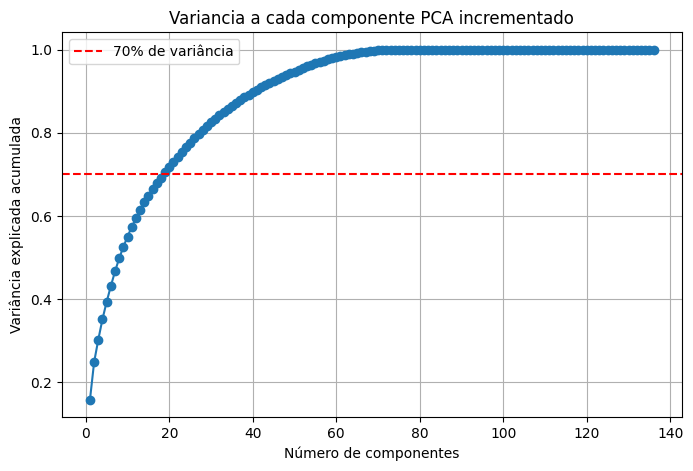

O numero de componentes será: 19


In [6]:
for n_comp in range(int(for_pca_data.shape[1])):
    # Aplicando PCA
    pca = PCA(n_components=n_comp)
    pca.fit(for_pca_data)
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()

# Definindo target de variancia
variance_target = 0.7

# Gráfico de varianca acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada acumulada')
plt.title('Variancia a cada componente PCA incrementado')
plt.grid(True)
plt.axhline(y=variance_target, color='r', linestyle='--', label=f'{round(variance_target*100)}% de variância')
plt.legend()
plt.show()

# Automaticamente definindo número de clusters
num_components = next(i for i, val in enumerate(cumulative_variance) if val >= variance_target) + 1

print(f"O numero de componentes será: {num_components}")

Iremos utilizar 7 componentes para o nosso PCA definitivo, assim ainda mantemos uma boa quantidade de componentes e variações

## 3.2. Gerando dados com PCA

In [7]:
# PCA com o numero definido de componentes
pca_final = PCA(n_components=num_components)
for_kmeans_data = pca_final.fit_transform(for_pca_data)

# 4. Clusterização

## 4.1. Teste do cotovelo

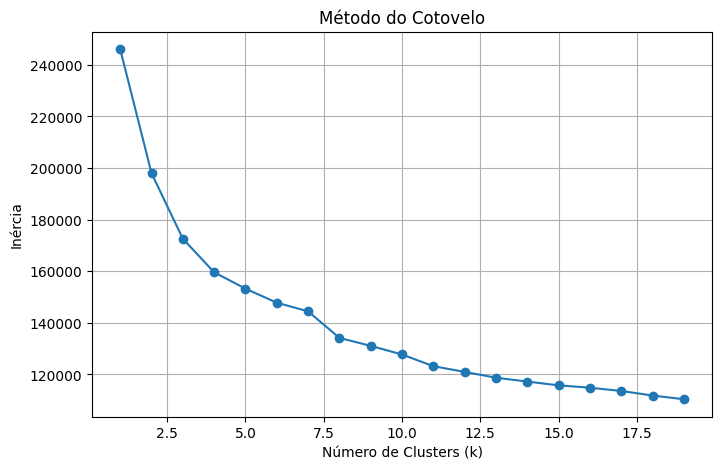

In [8]:
inertias = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(for_kmeans_data)
    inertias.append(kmeans.inertia_)

# 3. Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()

Pela curva do cotovelo vemos que quando atingimos 6 cluster, a inercia até o 7 reduz bastante para os outros numeros de clusters.

Porém, como há uma queda ao chegar em 8 clusters, esse será nosso número de clusters.


## 4.2. Gerando modelo

In [9]:
ideal_k = 8
kmeans_final = KMeans(n_clusters=ideal_k, random_state=3)
clusters = kmeans_final.fit_predict(for_kmeans_data)

## 4.3. Salvando clusters

In [10]:
origin_cols = ["cluster",
    "credit_card_limit",
    "age",
    "total_transactions",
    "avg_amount",
    "most_used_offer_type",
    "transactions_offer_rate",
    "avg_time_to_use_offer",
    "avg_time_to_view_offer",
    "all_coupon_usage_rate",
    "pct_used_channel_mobile",
    "pct_used_channel_email",
    "pct_used_channel_social",
    "pct_used_channel_web",
    "pct_used_type_bogo",
    "pct_used_type_discount",
    "all_coupon_viewed_rate",
    "pct_viewed_channel_mobile",
    "pct_viewed_channel_email",
    "pct_viewed_channel_social",
    "pct_viewed_channel_web",
    "pct_viewed_type_bogo",
    "pct_viewed_type_discount",
    "pct_viewed_type_informational",
    "total_offers_received",
    "total_mobile_offer",
    "total_email_offer",
    "total_social_offer",
    "total_web_offer",
    "total_offers_bogo",
    "total_offers_discount",
    "total_offers_informational",]

In [17]:
profiles_clustered = profiles.copy()
profiles_clustered["cluster"] = clusters
# Tabela utilizada para analise de clusters
profiles_clustered_to_group = profiles_clustered[origin_cols]
# Tabela utilizada para salvar os clusters por account_id
profiles_clustered_id = profiles_clustered[["account_id","cluster"]]

display(profiles_clustered_to_group.head(5))
display(profiles_clustered_id.head(5))

,cluster,credit_card_limit,age,total_transactions,avg_amount,most_used_offer_type,transactions_offer_rate,avg_time_to_use_offer,avg_time_to_view_offer,all_coupon_usage_rate,...,pct_viewed_type_discount,pct_viewed_type_informational,total_offers_received,total_mobile_offer,total_email_offer,total_social_offer,total_web_offer,total_offers_bogo,total_offers_discount,total_offers_informational
0,0,03_Entre_63000_e_79000,06_Acima_de_60+,02_Entre_4_e_7,02_Entre_3_e_12,NaN,01_Abaixo_de_0%,00_Sem_dados,00_Sem_dados,01_Abaixo_de_0%,...,01_Abaixo_de_50%,00_Sem_dados,04_Acima_de_7,03_Entre_5_e_7,04_Acima_de_7,03_Entre_3_e_5,04_Acima_de_6,04_Acima_de_3,02_Entre_1_e_2,00_Sem_dados
1,0,02_Entre_49000_e_63000,04_Entre_40_e_49,01_Abaixo_de_4,03_Entre_12_e_20,NaN,01_Abaixo_de_0%,00_Sem_dados,00_Sem_dados,01_Abaixo_de_0%,...,01_Abaixo_de_50%,02_Entre_50%_e_100%,03_Entre_5_e_7,03_Entre_5_e_7,03_Entre_5_e_7,03_Entre_3_e_5,03_Entre_4_e_6,04_Acima_de_3,01_Abaixo_de_1,01_Abaixo_de_1
2,0,00_Sem_dados,00_Sem_dados,01_Abaixo_de_4,02_Entre_3_e_12,NaN,01_Abaixo_de_0%,00_Sem_dados,00_Sem_dados,01_Abaixo_de_0%,...,00_Sem_dados,02_Entre_50%_e_100%,02_Entre_4_e_5,02_Entre_3_e_5,02_Entre_4_e_5,03_Entre_3_e_5,01_Abaixo_de_3,01_Abaixo_de_1,00_Sem_dados,04_Acima_de_2
3,4,03_Entre_63000_e_79000,04_Entre_40_e_49,04_Acima_de_11,04_Entre_20_e_28,bogo,03_Entre_17%_e_33%,01_Abaixo_de_2,03_Entre_2_e_3,04_Acima_de_71%,...,00_Sem_dados,00_Sem_dados,04_Acima_de_7,04_Acima_de_7,04_Acima_de_7,04_Acima_de_5,04_Acima_de_6,04_Acima_de_3,00_Sem_dados,00_Sem_dados
4,3,01_Abaixo_de_49000,04_Entre_40_e_49,01_Abaixo_de_4,02_Entre_3_e_12,NaN,01_Abaixo_de_0%,00_Sem_dados,00_Sem_dados,01_Abaixo_de_0%,...,01_Abaixo_de_50%,00_Sem_dados,02_Entre_4_e_5,02_Entre_3_e_5,02_Entre_4_e_5,01_Abaixo_de_2,02_Entre_3_e_4,02_Entre_1_e_2,03_Entre_2_e_3,00_Sem_dados


,account_id,cluster
0,c05652fa9d2c4fac9a010ea5a9310c86,0
1,6be0513109fe4d738e2af7fb252fefb7,0
2,9de54389816342449e445db1d75d341d,0
3,f5de20984950433d9c206f7c42477342,4
4,9da3f2339b244229a8337572e982b189,3


# 5. Agrupando para obter contagem por valor

In [13]:
# Lista de contagens agrupadas
grouped_series = []

# Iterando todas as colunas origem para obter contagem
for origin_col in origin_cols[1:]:
    temp = (profiles_clustered
        .groupby(['cluster', origin_col], as_index=False)
        .size()
        .rename(columns={
            "cluster": "CLUSTER",
            origin_col: "ATRIBUTO",
            "size": "COUNT",
        })
    )
    temp["ORIGEM"] = origin_col
    grouped_series.append(temp[["CLUSTER","ORIGEM","ATRIBUTO","COUNT"]])

# Combinação das contagens
counted_origins_values = pd.concat(grouped_series, ignore_index=True)
counted_origins_values.head(5)

,CLUSTER,ORIGEM,ATRIBUTO,COUNT
0,0,credit_card_limit,00_Sem_dados,1151
1,0,credit_card_limit,01_Abaixo_de_49000,625
2,0,credit_card_limit,02_Entre_49000_e_63000,552
3,0,credit_card_limit,03_Entre_63000_e_79000,424
4,0,credit_card_limit,04_Acima_de_79000,290


In [14]:
counted_origins_values.to_excel("../data/processed/profile_clustered_dados.xlsx", index=False)

# 6. Salvando respectivos clusters de cada account_id

In [19]:
profiles_clustered_id.to_csv("../data/processed/profile_clustered_id.csv", index=False)